# Foundation of Computational Social System
## Group Project - Analysis Part-

### Import library and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fake_news_dataset.csv")

In [3]:
df.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


### Pre-processing

In [4]:
df[['sentiment_score', 'num_shares', 'label']].isnull().sum()

sentiment_score    0
num_shares         0
label              0
dtype: int64

In [5]:
df.dtypes

id                     int64
title                 object
author                object
text                  object
state                 object
date_published        object
source                object
category              object
sentiment_score      float64
word_count             int64
char_count             int64
has_images             int64
has_videos             int64
readability_score    float64
num_shares             int64
num_comments           int64
political_bias        object
fact_check_rating     object
is_satirical           int64
trust_score            int64
source_reputation      int64
clickbait_score      float64
plagiarism_score     float64
label                 object
dtype: object

In [6]:
# 0.01 was set in the previous study
def sentiment_category(score):
    if score > 0.01:
        return "positive"
    elif score < -0.01:
        return "negative"
    else:
        return "neutral"
    
df["sentiment"] = df["sentiment_score"].apply(sentiment_category)   

### EDA

#### Check the assumptions

In [7]:
pd.crosstab(df.sentiment, df.label, normalize = "index")

label,Fake,Real
sentiment,,
negative,0.506329,0.493671
neutral,0.463768,0.536232
positive,0.508180,0.491820


##### Comment
This dataset is classified into three levels of sentiment: positive, neutral, and negative.     
There is no significant trends on the relationships between sentiment and the varacity of the news.
Therefore, there is not the assumption which was stated in the previous study in this dataset.

#### Check the distribution of number of shares

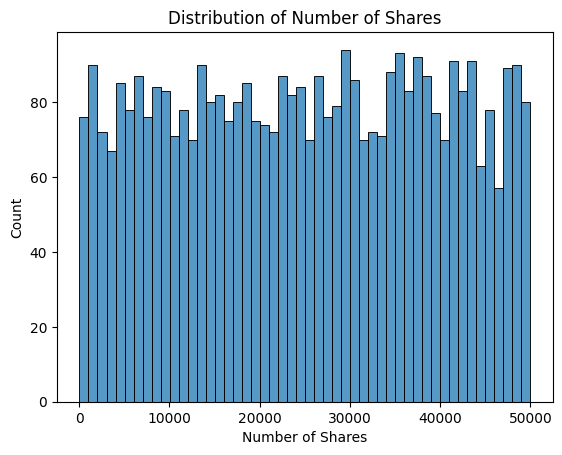

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['num_shares'], bins=50)
plt.title('Distribution of Number of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Count')
plt.show()

#### Check number of shares by sentiment category

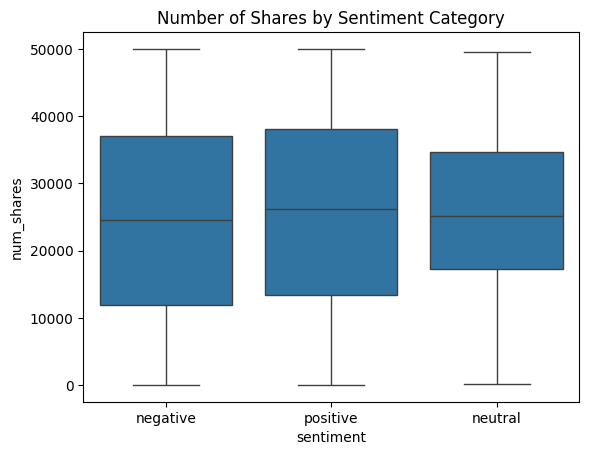

In [9]:
sns.boxplot(x = 'sentiment', y = 'num_shares', data = df)
plt.title('Number of Shares by Sentiment Category')
plt.show()

### Data Analysis (ANOVA)
#### RQ: What aspects of a post influence its engagement on social media?

#### RQ1: Does the sentiment of a news article (negative/neutral/positive) affect its number of shares?

In [10]:
""" 
Method: One-way ANOVA
Null Hypotheses: There is no difference in mean of the number of shares among the sentiment categories.
Alternative Hypotheses: At least one sentiment category differs in mean of the number of shares from the others.
"""

import statsmodels.api as sm
from statsmodels.formula.api import ols

model1 = ols('num_shares ~ C(sentiment)', data = df).fit()
anova_table1 = sm.stats.anova_lm(model1, typ = 2)
print(anova_table1)

                    sum_sq      df         F    PR(>F)
C(sentiment)  1.121326e+09     2.0  2.710818  0.066605
Residual      8.266766e+11  3997.0       NaN       NaN


##### Comment
Since the p-value (0.067) is smaller than 0.1 but larger than 0.05, we reject the null hypotheses at the 10% significance level, but not at the 5% level.

#### RQ1 Visualisation

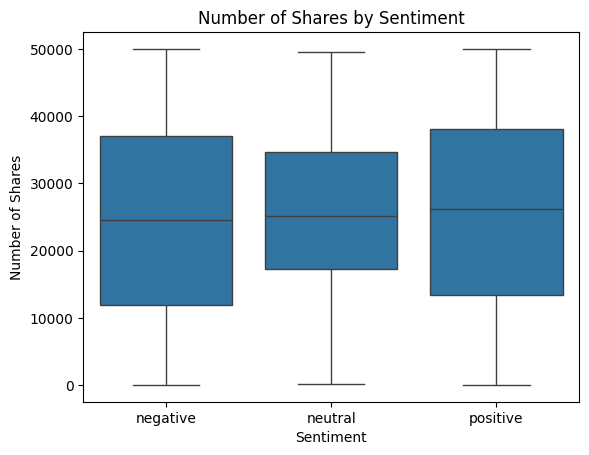

In [11]:
palette = {'negative':'brown', 'neutral':'goldenrod', 'positive':'forestgreen'}
sns.boxplot(x = 'sentiment', y = 'num_shares', data = df, order = ['negative', 'neutral', 'positive'])
plt.title("Number of Shares by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Shares")
plt.savefig('figure_rq1.png', transparent=True, dpi=300)
plt.show()

#### RQ2: Does the varacity of a news article (fake/true) affect its number of shares?

In [12]:
"""
Method: One-way ANOVA
Null Hypotheses: There is no difference in mean of number of shares between fake and true articles.
Alternative Hypotheses: There is difference in mean of number of shares between fake and true articles.
"""

model2 = ols('num_shares ~ C(label)', data = df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ = 2)
print(anova_table2)

                sum_sq      df         F    PR(>F)
C(label)  4.330885e+08     1.0  2.092774  0.148076
Residual  8.273648e+11  3998.0       NaN       NaN


#### Comment
As the p-value is 0.15 which is larger than 0.05, we cannot reject the null hypotheses.

#### RQ2 Visualisation

/var/folders/9v/b7_1rn392zd_h3_wkj_ydpz80000gp/T/ipykernel_21491/695123297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'label', y = 'num_shares', data = df, palette=palette)


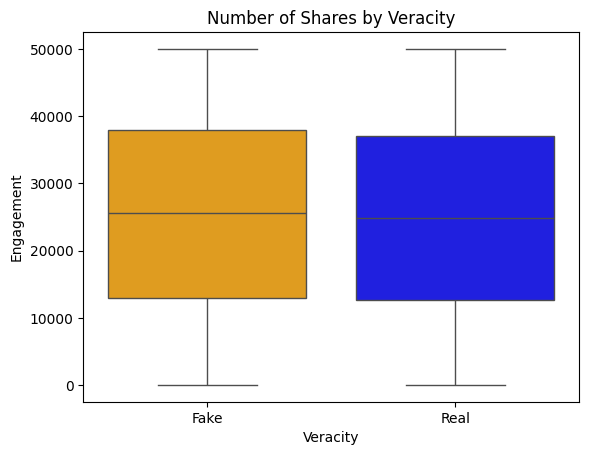

In [29]:
palette = {'Real': 'blue', 'Fake': 'orange'}
sns.boxplot(x = 'label', y = 'num_shares', data = df, palette=palette)
plt.title("Number of Shares by Veracity")
plt.xlabel("Veracity")
plt.ylabel("Engagement")
plt.savefig('figure_rq2.png', transparent=True, dpi=300)
plt.show()

#### RQ3: does the combination of sentiment and varacity influence number of shares?

In [14]:
"""
Method: Two-way ANOVA
Null hypotheses: There is no interaction effect between sentiment and varacity on number of shares.
Alternative hypotheses: There is an interaction effect between sentiment and varacity on number of shares.
"""

model3 = ols('num_shares ~ C(sentiment) + C(label) + C(sentiment)*C(label)', data = df).fit()
anova_table3 = sm.stats.anova_lm(model3, typ = 2)
print(anova_table3)

                             sum_sq      df         F    PR(>F)
C(sentiment)           1.121179e+09     2.0  2.715549  0.066291
C(label)               4.329419e+08     1.0  2.097211  0.147647
C(sentiment):C(label)  1.734241e+09     2.0  4.200412  0.015056
Residual               8.245094e+11  3994.0       NaN       NaN


#### Comment
The p-value of the main effect of sentiment is 0.067, which is larger than 0.05.   
The p-value of the main effect of varacity is 0.15, which is larger than 0.05.    
The p-value of the interaction effect of sentiment and varacity is 0.015, which is smaller than 0.05. Therefore, we reject the null hypotheses. 

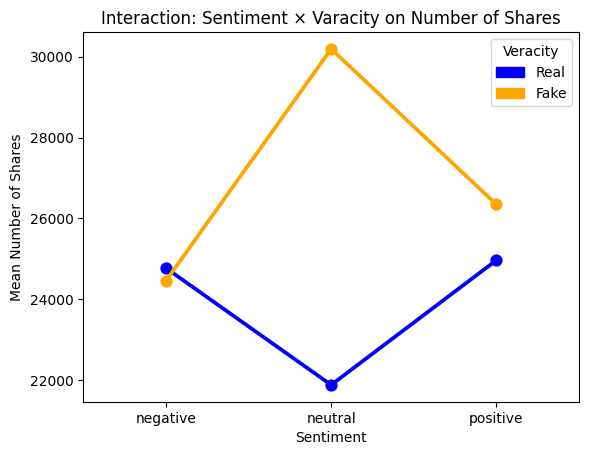

In [30]:
import matplotlib.patches as mpatches

palette = {'Real' : 'blue', 'Fake': 'orange'}

mean_df = df.groupby(['sentiment', 'label'])['num_shares'].mean().reset_index()

sns.pointplot(x = 'sentiment', y = 'num_shares', hue = 'label', data = mean_df, marker = 'o', errorbar = ('ci', False), palette=palette, hue_order=['Real','Fake'])

plt.ylabel('Mean Number of Shares')
plt.xlabel('Sentiment')
plt.title('Interaction: Sentiment × Varacity on Number of Shares')
handles = [mpatches.Patch(color = palette['Real'], label = 'Real'), mpatches.Patch(color=palette['Fake'], label = 'Fake')]
plt.legend(handles = handles, title = 'Veracity')
plt.savefig('figure_3.png', transparent=True, dpi=300)
plt.show()

### Reference
[1] Bobbitt, Z. (2023, February 28). Pandas: How to Create Crosstab with Percentages. Statology. https://www.statology.org/pandas-crosstab-percentage/. Accessed on 09-01-2026.   
[2] GeeksforGeeks. (2025c, July 23). How to Obtain ANOVA Table with Statsmodels. GeeksforGeeks. https://www.geeksforgeeks.org/data-analysis/how-to-obtain-anova-table-with-statsmodels/#1-oneway-anova. Accessed on 09-01-2026.    
[3] GeeksforGeeks. (2025d, July 23). How to perform a TwoWay ANOVA in Python. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/how-to-perform-a-two-way-anova-in-python/. Accessed on 09-01-2026. 
[4] Legend guide — Matplotlib 3.10.8 documentation. (n.d.). https://matplotlib.org/stable/users/explain/axes/legend_guide.html. Accessed on 09-01-2026. 
[5] List of named colors — Matplotlib 3.10.8 documentation. (n.d.). https://matplotlib.org/stable/gallery/color/named_colors.html. Accessed on 14-01-2026.     
[6] Vallat, R., PhD. (n.d.). ANOVA in Python. https://raphaelvallat.com/pingouin.html. Accessed on 09-01-2026.